#Bibliotecas

In [23]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#1. Lectura de datos

In [9]:
df_crimen = pd.read_csv(
    r'/content/crimen.txt',
    low_memory=False,
    sep="\t"
)
df_crimen.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


#2. Analisis exploratorio

In [10]:
df_crimen.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


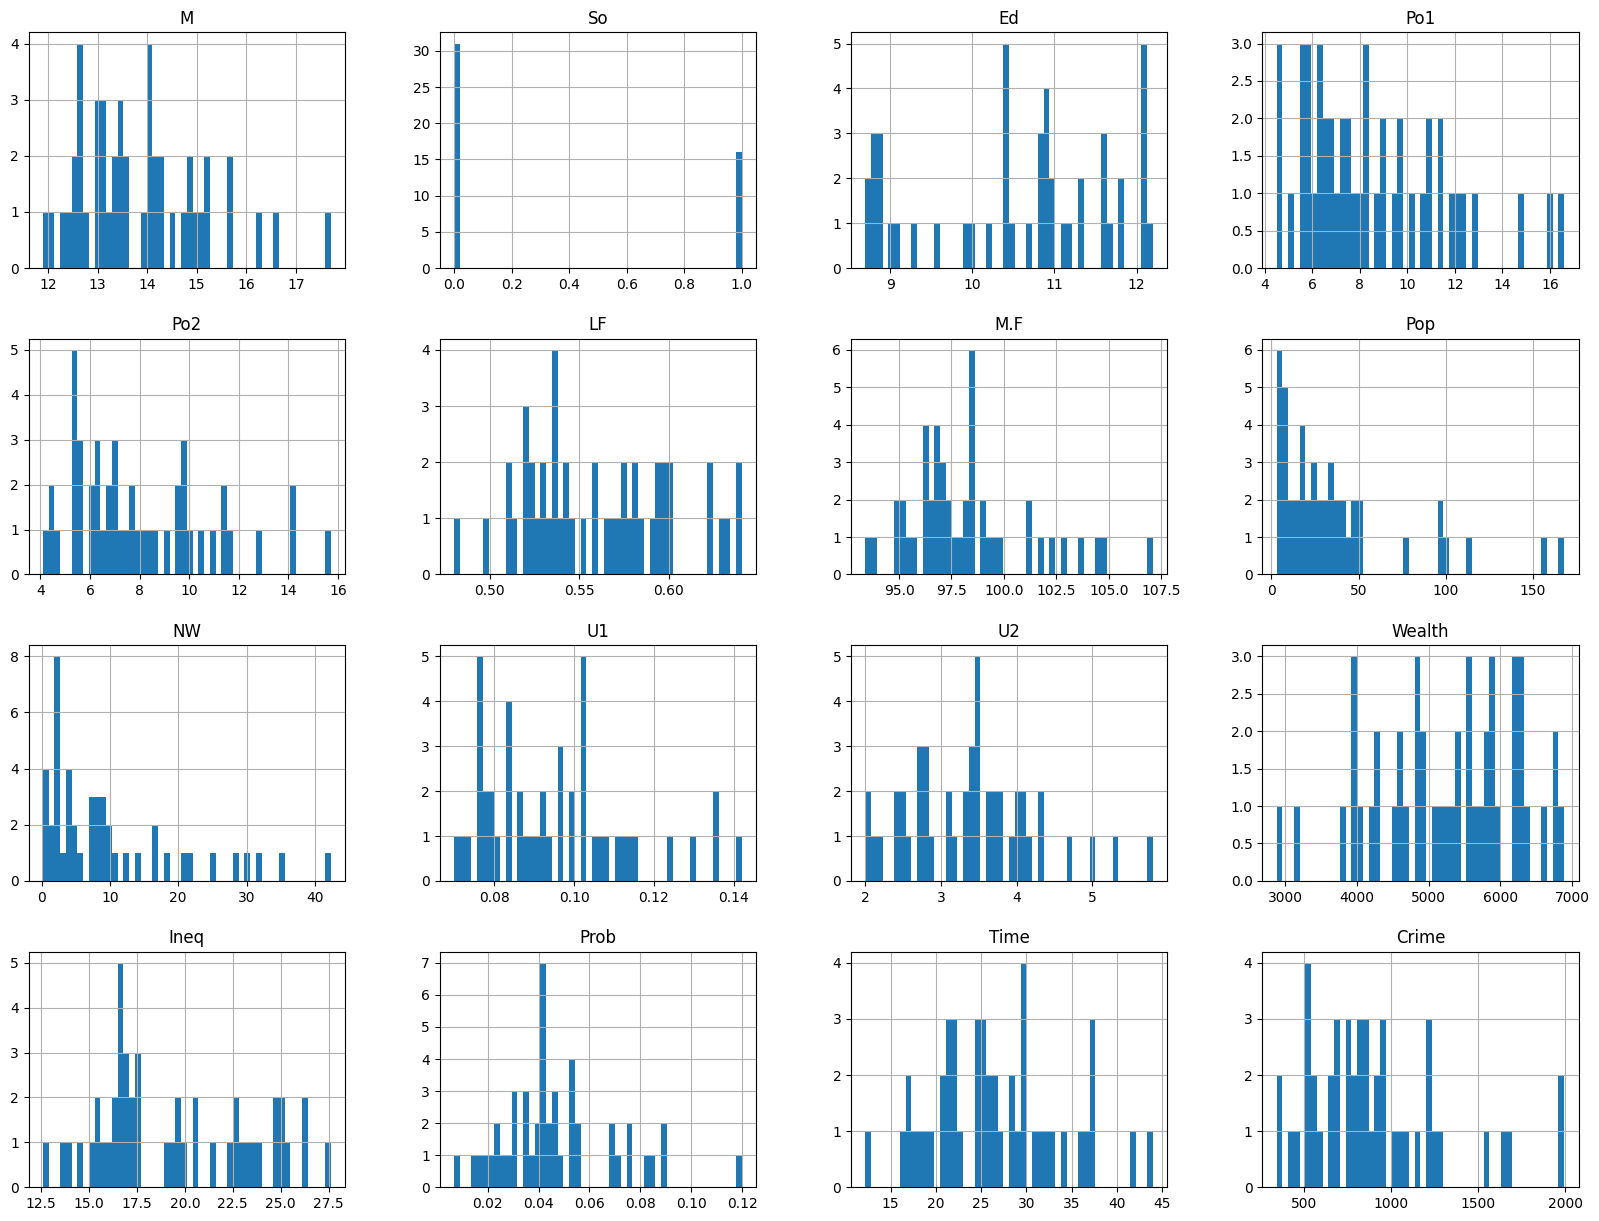

In [11]:
import matplotlib.pyplot as plt
df_crimen.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
df_crimen.isnull().sum()


,0
M,0
So,0
Ed,0
Po1,0
Po2,0
LF,0
M.F,0
Pop,0
NW,0
U1,0


##Diccionario variables

    M: Porcentaje de hombres de 14 a 24 años en la población total del estado.

    So: Variable indicadora para identificar si un estado está en el sur de los EE. UU.

    Ed: Años promedio de escolaridad de la población de 25 años o más.

    Po1: Gasto per cápita en protección policial en el año 1960.

    Po2: Gasto per cápita en protección policial en el año 1959.

    LF: Tasa de participación en la fuerza laboral de hombres urbanos civiles en el grupo de edad de 14 a 24 años.

    M.F: Número de hombres por cada 100 mujeres.

    Pop: Población del estado en 1960, medida en cientos de miles.

    NW: Porcentaje de personas no blancas en la población.

    U1: Tasa de desempleo de hombres urbanos de 14 a 24 años.

    U2: Tasa de desempleo de hombres urbanos de 35 a 39 años.

    Wealth: Riqueza: mediana del valor de los activos transferibles o del ingreso familiar.

    Ineq: Desigualdad de ingresos: porcentaje de familias que ganan por debajo de la mitad del ingreso mediano.

    Prob: Probabilidad de encarcelamiento: ratio entre el número de ingresos a prisión y el número de delitos.

    Time: Tiempo promedio en meses que los delincuentes permanecen en prisiones estatales antes de su primera liberación.

    Crime: Tasa de criminalidad: número de delitos por cada 100,000 habitantes

#3. Matriz de correlaciones

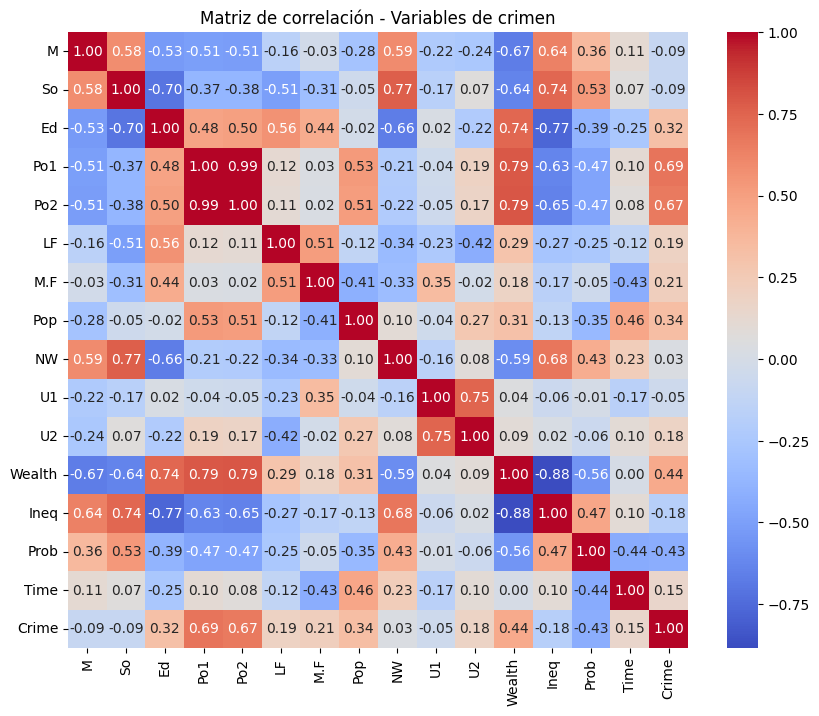

Correlaciones con Crime:
 Crime     1.000000
Po1       0.687604
Po2       0.666714
Wealth    0.441320
Pop       0.337474
Ed        0.322835
M.F       0.213914
LF        0.188866
U2        0.177321
Time      0.149866
NW        0.032599
U1       -0.050478
M        -0.089472
So       -0.090637
Ineq     -0.179024
Prob     -0.427422
Name: Crime, dtype: float64


In [14]:
# Calcular correlaciones
import seaborn as sns
corr = df_crimen.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - Variables de crimen')
plt.show()

# Ordenar las correlaciones respecto a Crime
corr_target = corr['Crime'].sort_values(ascending=False)
print("Correlaciones con Crime:\n", corr_target)


Correlacion con Crime (objetivo)

Po1 (0.69) y Po2 (0.67):
Los estados con mayor gasto policial suelen tener más delitos reportados, posiblemente porque cuentan con mejor capacidad para detectarlos, no necesariamente porque haya más crimen.

Wealth, Pop y Ed:
La riqueza, la población y la escolaridad tienen una relación débil con la tasa de crimen, lo que indica que su influencia es menor comparada con el gasto policial o la desigualdad.



#4. Distribucion variable objetivo

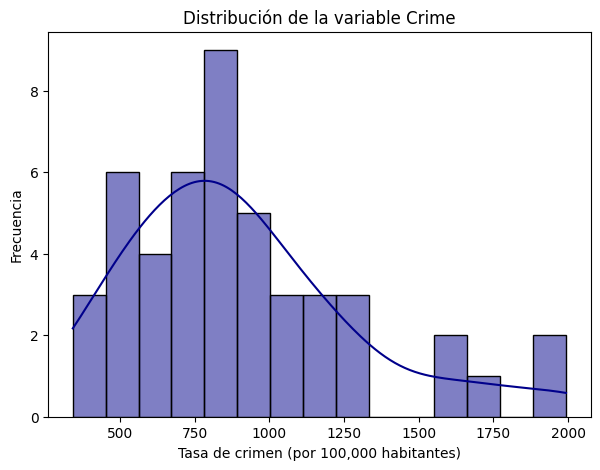

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(df_crimen['Crime'], bins=15, kde=True, color='darkblue')
plt.title('Distribución de la variable Crime')
plt.xlabel('Tasa de crimen (por 100,000 habitantes)')
plt.ylabel('Frecuencia')
plt.show()


#5. Variables y target

In [20]:
X = df_crimen.drop(columns=['Crime']).copy()
y = df_crimen['Crime'].astype(float)

num_features = X.columns.tolist()


#6. Conjunto entrenamiento

In [22]:
#80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#7. Entrenamiento

In [24]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = modelo_lineal.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [26]:
print("Coeficientes del modelo:")
for name, coef in zip(X.columns, modelo_lineal.coef_):
    print(f"{name}: {coef:.4f}")

print("\nIntercepto:", modelo_lineal.intercept_)
print(f"\nRMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

Coeficientes del modelo:
M: 103.8501
So: 28.7377
Ed: 187.6738
Po1: 168.2051
Po2: -75.6041
LF: 1605.4139
M.F: 3.3268
Pop: -1.2689
NW: 2.7780
U1: -5004.2865
U2: 192.3652
Wealth: 0.0864
Ineq: 74.3118
Prob: -4208.4133
Time: -0.1758

Intercepto: -6403.822678406827

RMSE: 196.28
R²: 0.816


##Evaluacion grafica

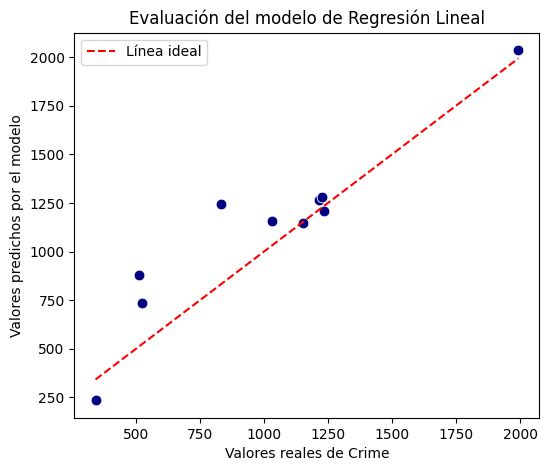

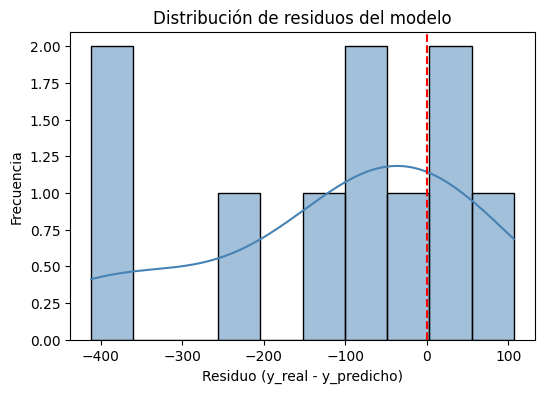

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de valores reales vs predichos
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, color='navy', s=60)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--', label='Línea ideal')
plt.xlabel('Valores reales de Crime')
plt.ylabel('Valores predichos por el modelo')
plt.title('Evaluación del modelo de Regresión Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuos, bins=10, kde=True, color='steelblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de residuos del modelo')
plt.xlabel('Residuo (y_real - y_predicho)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


##Nuevo estado

In [29]:
# Diccionario con las características del nuevo estado
nuevo_estado = {
    'M': 14.0,
    'So': 0,
    'Ed': 10.0,
    'Po1': 12.0,
    'Po2': 15.5,
    'LF': 0.640,
    'M.F': 94.0,
    'Pop': 150,
    'NW': 1.1,
    'U1': 0.120,
    'U2': 3.6,
    'Wealth': 3200,
    'Ineq': 20.1,
    'Prob': 0.04,
    'Time': 39.0
}

# Convertir a DataFrame con el mismo orden de columnas
nuevo_df = pd.DataFrame([nuevo_estado])[X.columns]

# Predicción
pred_crime = modelo_lineal.predict(nuevo_df)[0]

print(f"Tasa de crimen estimada para el nuevo estado: {pred_crime:.2f} delitos por cada 100,000 habitantes")


Tasa de crimen estimada para el nuevo estado: 613.31 delitos por cada 100,000 habitantes


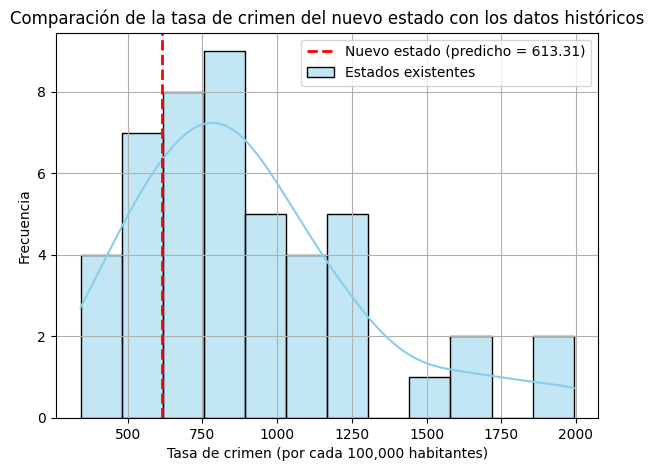

In [31]:
# Agregar el valor pronosticado a los datos originales
plt.figure(figsize=(7,5))
sns.histplot(df_crimen['Crime'], bins=12, kde=True, color='skyblue', label='Estados existentes')
plt.axvline(pred_crime, color='red', linestyle='--', linewidth=2,
            label=f'Nuevo estado (predicho = {pred_crime:.2f})')

plt.title('Comparación de la tasa de crimen del nuevo estado con los datos históricos')
plt.xlabel('Tasa de crimen (por cada 100,000 habitantes)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()


a. Muestre el output (de R o Python) al correr su modelo, en particular:
* Los regresores usados.
* Los coeficientes estimados.
* La tasa de crimen pronosticada para las características especificadas anteriormente.

In [32]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_lineal.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("Regresores usados y coeficientes estimados:\n")
display(coef_df)
print("\nIntercepto:", modelo_lineal.intercept_)


Regresores usados y coeficientes estimados:



,Variable,Coeficiente
5,LF,1605.413860
10,U2,192.365247
2,Ed,187.673753
3,Po1,168.205114
0,M,103.850070
12,Ineq,74.311796
1,So,28.737732
6,M.F,3.326783
8,NW,2.777967
11,Wealth,0.086415



Intercepto: -6403.822678406827


###Tasa de crimen

In [33]:
print(f"Tasa de crimen estimada para el nuevo estado: {pred_crime:.2f} delitos por cada 100,000 habitantes")


Tasa de crimen estimada para el nuevo estado: 613.31 delitos por cada 100,000 habitantes


b. Elija dos de los coeficientes estimados e interprételos.

* LF -> los estados con mayor participación laboral en hombres jóvenes tienden a tener más crímenes reportados.

* Ed -> Los estados con más educación presentan también mayor urbanización y registro delictivo.

* Po1 -> Más gasto en seguridad está asociado con mayor número de delitos registrados.

c. Obtenga el MSE y el MAE e interprételos para evaluar el desempeño de su modelo.

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 38526.95
MAE: 140.62


* MSE (Mean Squared Error) -> El modelo predice con buena precisión; aunque los valores no coinciden exactamente, las diferencias cuadradas (los errores) son pequeñas en proporción al rango de los datos.

* MAE (Mean Absolute Error) -> El modelo se equivoca 140 delitos por cada 100,000 habitantes

#Conclusion

El modelo presenta buen ajuste y errores moderados, adecuados para el tamaño de la muestra (47 estados). Las variables más determinantes son las de tipo socioeconómico y de política criminal, y el modelo logra estimar con precisión razonable la tasa de crimen esperada para nuevos estados.